<a href="https://colab.research.google.com/github/MohitGupta2021/ml/blob/main/random_forests_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
elect_data=fetch_openml(name='electricity',version=1)

In [5]:
type(elect_data)

sklearn.utils.Bunch

In [6]:
elect_data.details

{'collection_date': '1998-12-05',
 'creator': ['M. Harries', 'J. Gama', 'A. Bifet'],
 'default_target_attribute': 'class',
 'description_version': '1',
 'file_id': '2419',
 'format': 'ARFF',
 'id': '151',
 'language': 'English',
 'licence': 'Public',
 'md5_checksum': '8ca97867d960ae029ae3a9ac2c923d34',
 'name': 'electricity',
 'original_data_url': 'http://www.inescporto.pt/~jgama/ales/ales_5.html',
 'paper_url': 'http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.43.9013',
 'processing_date': '2020-11-20 20:01:19',
 'status': 'active',
 'tag': ['AzurePilot',
  'concept_drift',
  'electricity',
  'mythbusting_1',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_135',
  'study_14',
  'study_15',
  'study_16',
  'study_20',
  'study_34',
  'study_37',
  'study_41',
  'study_7',
  'study_70',
  'study_99'],
 'upload_date': '2014-04-10T02:42:23',
 'url': 'https://www.openml.org/data/v1/download/2419/electricity.arff',
 'version': '1',
 'version_label': '1',
 'visibi

In [7]:
elect_data.data.shape

(45312, 8)

In [8]:
elect_data.feature_names


['date',
 'day',
 'period',
 'nswprice',
 'nswdemand',
 'vicprice',
 'vicdemand',
 'transfer']

In [9]:
elect_df=elect_data.frame

In [10]:
type(elect_df)

pandas.core.frame.DataFrame

In [11]:
elect_df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


In [12]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(elect_df,test_size=0.2,random_state=20)

In [13]:
train_data.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
34913,0.875979,1,0.361702,0.029182,0.345135,0.001894,0.230192,0.653070,DOWN
32750,0.876598,5,0.297872,0.028552,0.483041,0.001834,0.559555,0.602193,DOWN
18448,0.443255,1,0.340426,0.040771,0.332490,0.002503,0.163905,0.765789,DOWN
10779,0.031415,2,0.574468,0.083073,0.515918,0.003467,0.422915,0.414912,DOWN
17423,0.442326,7,1.000000,0.054221,0.315234,0.003467,0.422915,0.414912,UP


In [14]:
train_data.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

In [15]:
corr=train_data.corr()

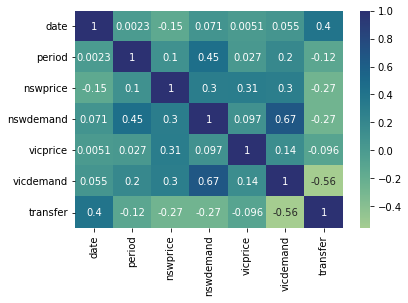

In [16]:
sns.heatmap(corr,annot=True,cmap='crest')

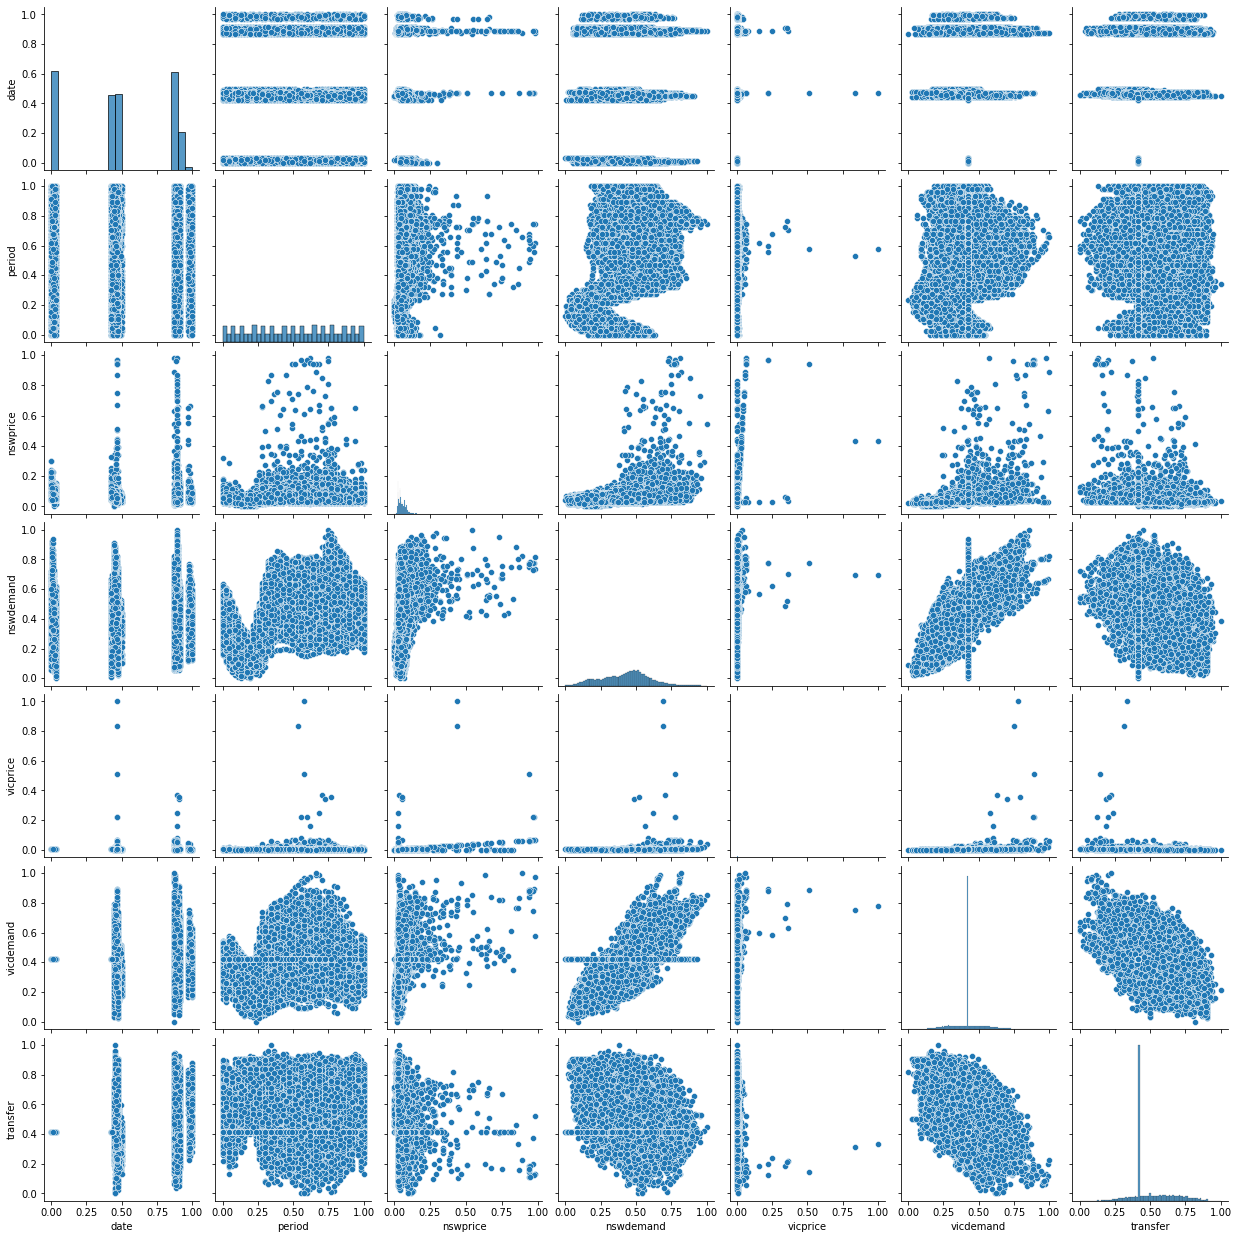

In [17]:
sns.pairplot(data=train_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f215cb3ba10>,
      dtype=object)

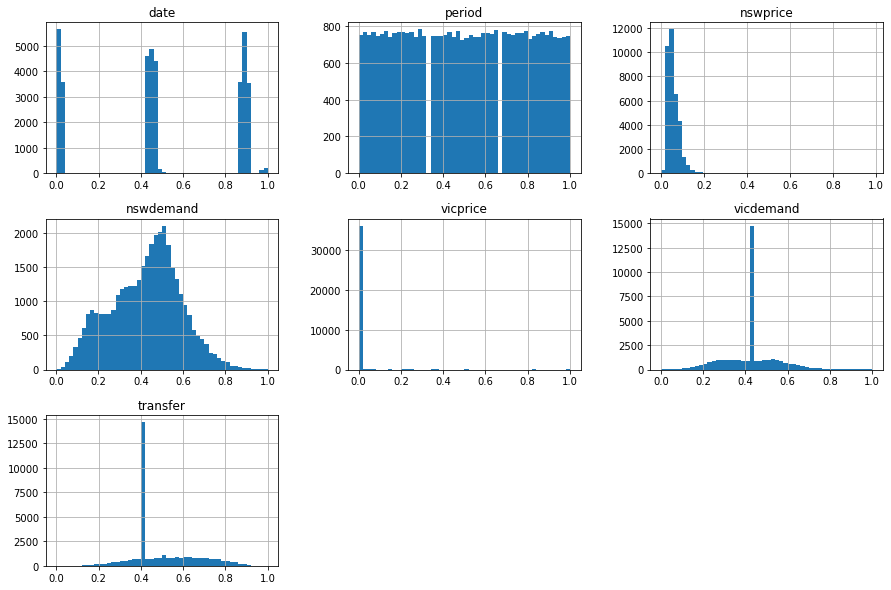

In [18]:
train_data.hist(bins=50,figsize=(15,10))

In [19]:
X_train=train_data.drop('class',axis=1)
Y_train=train_data['class']

In [20]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()

y_train_prepared=label_enc.fit_transform(Y_train)

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(min_samples_split=2,bootstrap=False, random_state=42,n_jobs=-1,max_features='sqrt')

forest_clf.fit(X_train, y_train_prepared)

RandomForestClassifier(bootstrap=False, max_features='sqrt', n_jobs=-1,
                       random_state=42)

In [22]:
from sklearn.metrics import confusion_matrix

def conf_matrix(input_data,model,labels):
    
    
    preds = model.predict(input_data)
    cm = confusion_matrix(labels,preds)
    
    return cm

In [23]:
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    
    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)
    
    return report

In [24]:
from sklearn.metrics import accuracy_score

def accuracy(input_data,model,labels):
   
    
    preds = model.predict(input_data)
    acc = accuracy_score(labels,preds)
    
    return acc

In [25]:
accuracy(X_train,forest_clf,y_train_prepared)

1.0

In [26]:
conf_matrix(X_train,forest_clf,y_train_prepared)

array([[20831,     0],
       [    0, 15418]])

In [27]:
class_report(X_train,forest_clf,y_train_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20831
           1       1.00      1.00      1.00     15418

    accuracy                           1.00     36249
   macro avg       1.00      1.00      1.00     36249
weighted avg       1.00      1.00      1.00     36249



In [28]:
forest_clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, max_features='sqrt', n_jobs=-1,
                       random_state=42)>

In [29]:
from sklearn.model_selection import GridSearchCV
params_grid={
    'n_estimators':[100,200,300,400,500],'max_leaf_nodes':list(range(0,10)),'min_samples_leaf':[0,1,2,3,4]}

grid_search = GridSearchCV(RandomForestClassifier(bootstrap=False,random_state=42,class_weight='balanced',n_jobs=-1,max_features='sqrt'), params_grid, verbose=1, cv=3)

grid_search.fit(X_train, y_train_prepared)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight='balanced',
                                              max_features='sqrt', n_jobs=-1,
                                              random_state=42),
             param_grid={'max_leaf_nodes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)